# Initial Analysis of Total Trade Spend CSV
Exploring data containted in the file by utilizing the Pandas library and creating plots with Seaborn to identify any potential trends within data 

In [1]:
pwd

'C:\\Users\\cynth\\Downloads'

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_TTSpend = pd.read_csv('kenvue_data\\Total Trade Spend.csv')

##### Overview of data contained in file

In [4]:
df_TTSpend

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,5552,14264,1563,18716,5075
1,2021,2,18939,12329,8658,8069,11307
2,2021,3,11346,6351,4032,3128,6585
3,2021,4,4801,14715,13935,9324,6835
4,2021,5,17470,16092,13601,5460,11902
...,...,...,...,...,...,...,...
144,2023,41,2918,2361,15546,7217,9652
145,2023,42,10743,15952,3993,6707,17320
146,2023,43,7823,19451,12462,1217,4638
147,2023,46,19575,14362,12145,16973,575


In [5]:
df_TTSpend.columns

Index(['Fiscal Year', 'Fiscal Week', 'Need State 1', 'Need State 2',
       'Need State 3', 'Need State 4', 'Need State 5'],
      dtype='object')

In [6]:
df_TTSpend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fiscal Year   149 non-null    int64
 1   Fiscal Week   149 non-null    int64
 2   Need State 1  149 non-null    int64
 3   Need State 2  149 non-null    int64
 4   Need State 3  149 non-null    int64
 5   Need State 4  149 non-null    int64
 6   Need State 5  149 non-null    int64
dtypes: int64(7)
memory usage: 8.3 KB


In [7]:
df_TTSpend.shape

(149, 7)

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Plotting Weekly Trade Spend Data

### Weekly Trade Spend for Each Need State

<Axes: xlabel='Fiscal Week', ylabel='Need State 1'>

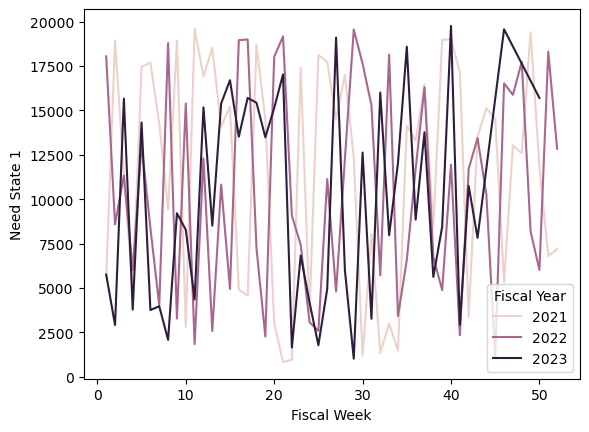

In [10]:
sns.lineplot(data=df_TTSpend, x='Fiscal Week', y='Need State 1', hue='Fiscal Year')

<Axes: xlabel='Fiscal Week', ylabel='Need State 2'>

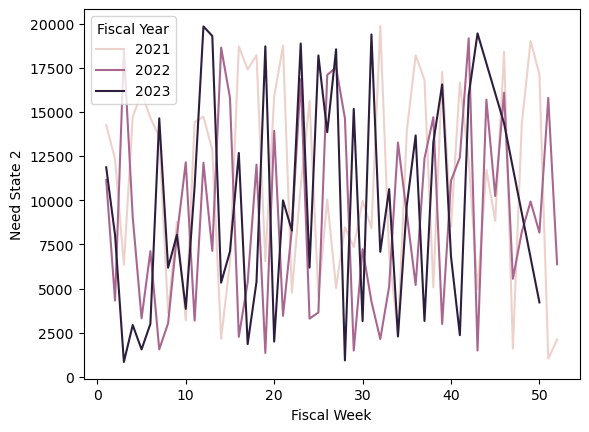

In [11]:
sns.lineplot(data=df_TTSpend, x='Fiscal Week', y='Need State 2', hue='Fiscal Year')

<Axes: xlabel='Fiscal Week', ylabel='Need State 3'>

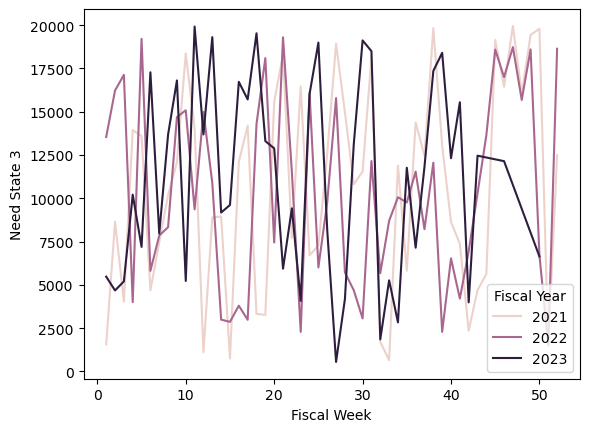

In [12]:
sns.lineplot(data=df_TTSpend, x='Fiscal Week', y='Need State 3', hue='Fiscal Year')

<Axes: xlabel='Fiscal Week', ylabel='Need State 4'>

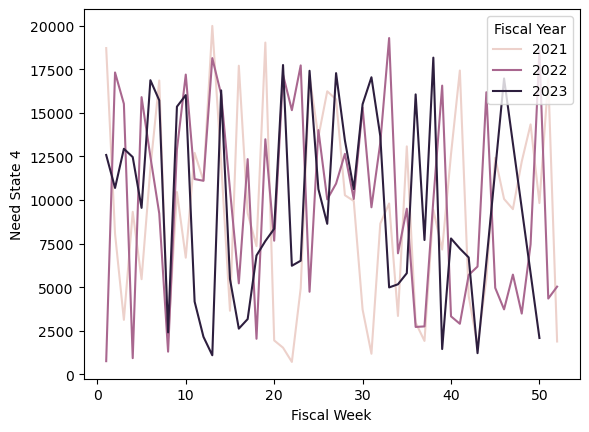

In [13]:
sns.lineplot(data=df_TTSpend, x='Fiscal Week', y='Need State 4', hue='Fiscal Year')

<Axes: xlabel='Fiscal Week', ylabel='Need State 5'>

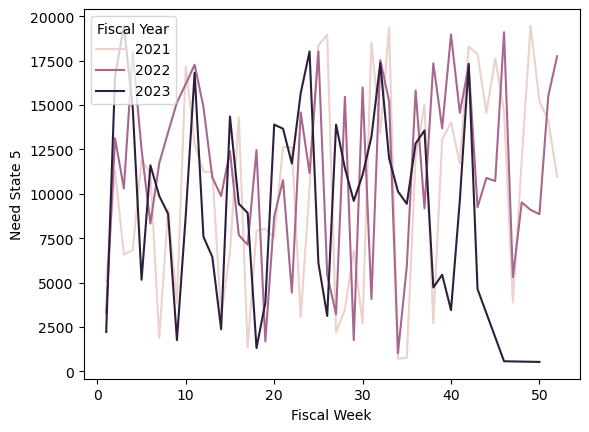

In [14]:
sns.lineplot(data=df_TTSpend, x='Fiscal Week', y='Need State 5', hue='Fiscal Year')

### 
## Creating a df for Trade Spend in Each Quarter

In [16]:
Q1 = df_TTSpend[(df_TTSpend['Fiscal Week']<=13)]
Q2 = df_TTSpend[(df_TTSpend['Fiscal Week']>13) & (df_TTSpend['Fiscal Week']<=26)]
Q3 = df_TTSpend[(df_TTSpend['Fiscal Week']>26) & (df_TTSpend['Fiscal Week']<=39)]
Q4 = df_TTSpend[(df_TTSpend['Fiscal Week']>39)]

In [17]:
Q1 = Q1.groupby('Fiscal Year').sum().reset_index()
Q2 = Q2.groupby('Fiscal Year').sum().reset_index()
Q3 = Q3.groupby('Fiscal Year').sum().reset_index()
Q4 = Q4.groupby('Fiscal Year').sum().reset_index()

In [18]:
Q1['Fiscal Week'] = 1
Q2['Fiscal Week'] = 2
Q3['Fiscal Week'] = 3
Q4['Fiscal Week'] = 4

In [19]:
new = [Q1, Q2, Q3, Q4]

In [20]:
new_sheet = pd.concat(new)
new_sheet = new_sheet.sort_values(by=['Fiscal Year'])
new_sheet

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,176299,149619,118647,136373,120137
0,2021,2,133661,149955,127221,125242,124966
0,2021,3,130138,139858,154208,97263,110873
0,2021,4,158874,136533,153477,128884,184244
1,2022,1,123633,100625,157117,143979,165146
1,2022,2,133687,122079,117478,146273,124388
1,2022,3,143070,110173,109729,139593,136230
1,2022,4,146282,140242,157094,87614,166747
2,2023,1,97734,110885,146637,132036,130073
2,2023,2,141776,128459,159541,117540,122480


In [21]:
new_sheet = new_sheet.rename_axis(None, axis=1)
new_sheet = new_sheet.rename(columns={new_sheet.columns[1]: "Fiscal Quarter"})

In [22]:
new_sheet = new_sheet.reset_index(drop=True)

In [23]:
df = new_sheet

In [24]:
df

,Fiscal Year,Fiscal Quarter,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,176299,149619,118647,136373,120137
1,2021,2,133661,149955,127221,125242,124966
2,2021,3,130138,139858,154208,97263,110873
3,2021,4,158874,136533,153477,128884,184244
4,2022,1,123633,100625,157117,143979,165146
5,2022,2,133687,122079,117478,146273,124388
6,2022,3,143070,110173,109729,139593,136230
7,2022,4,146282,140242,157094,87614,166747
8,2023,1,97734,110885,146637,132036,130073
9,2023,2,141776,128459,159541,117540,122480


## 2023 Quarterly Data

In [25]:
df_2023 = df[(df['Fiscal Year']==2023)]

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 1'>

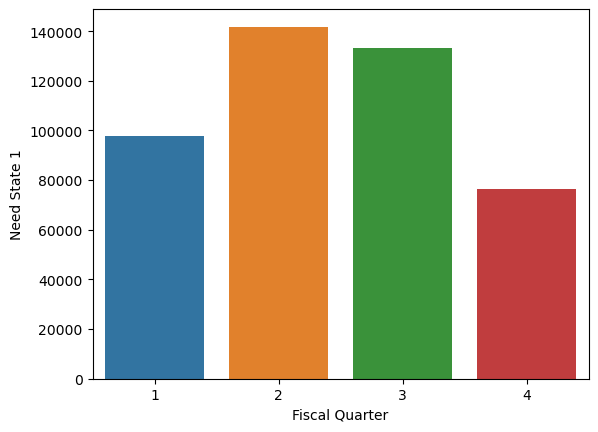

In [27]:
sns.barplot(data=df_2023, x='Fiscal Quarter', y='Need State 1')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 2'>

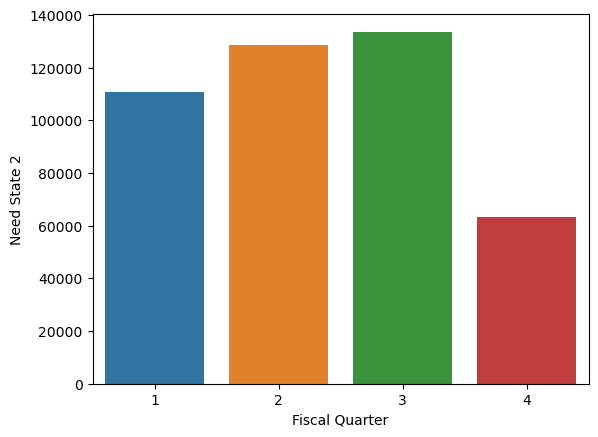

In [28]:
sns.barplot(data=df_2023, x='Fiscal Quarter', y='Need State 2')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 3'>

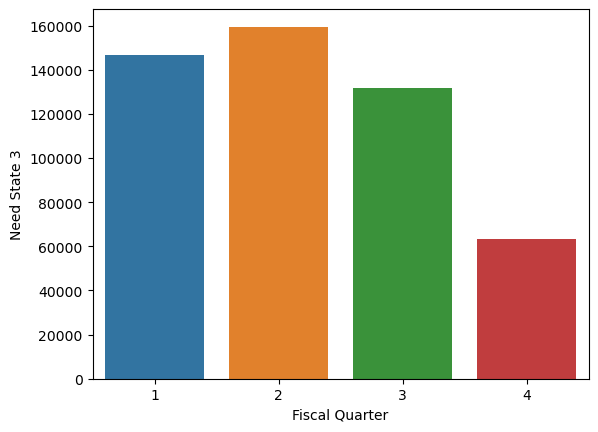

In [29]:
sns.barplot(data=df_2023, x='Fiscal Quarter', y='Need State 3')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 4'>

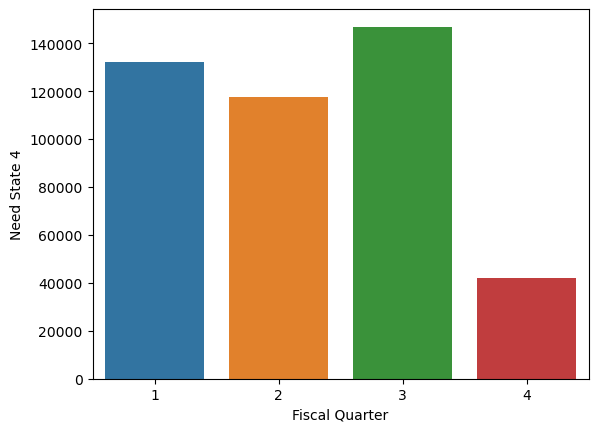

In [30]:
sns.barplot(data=df_2023, x='Fiscal Quarter', y='Need State 4')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 5'>

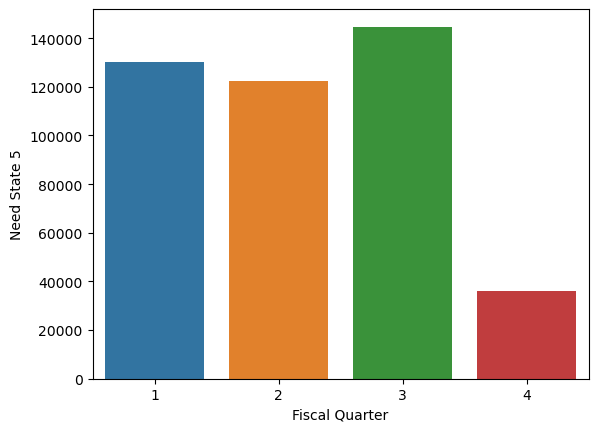

In [31]:
sns.barplot(data=df_2023, x='Fiscal Quarter', y='Need State 5')

## 2022 Quarterly Data

In [32]:
df_2022 = df[(df['Fiscal Year']==2022)]

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 1'>

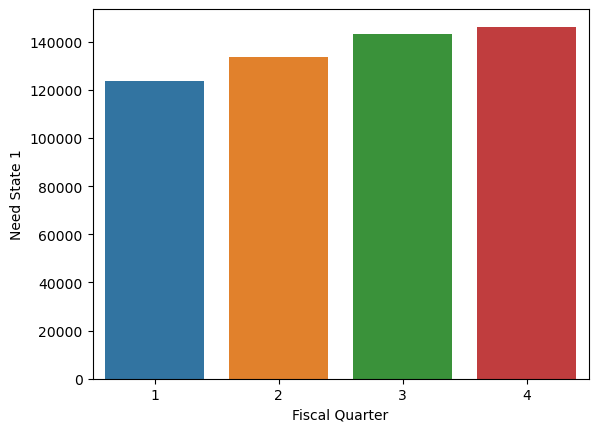

In [33]:
sns.barplot(data=df_2022, x='Fiscal Quarter', y='Need State 1')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 2'>

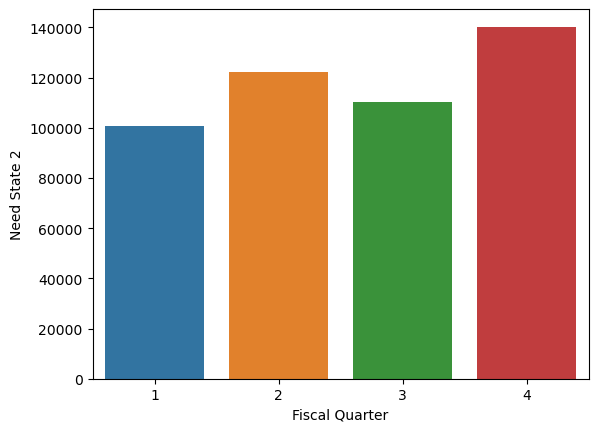

In [34]:
sns.barplot(data=df_2022, x='Fiscal Quarter', y='Need State 2')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 3'>

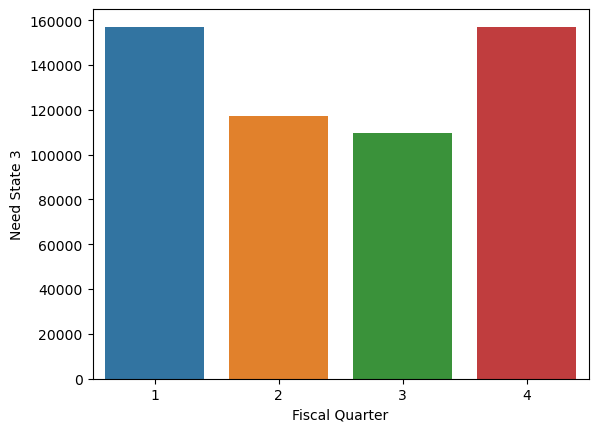

In [35]:
sns.barplot(data=df_2022, x='Fiscal Quarter', y='Need State 3')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 4'>

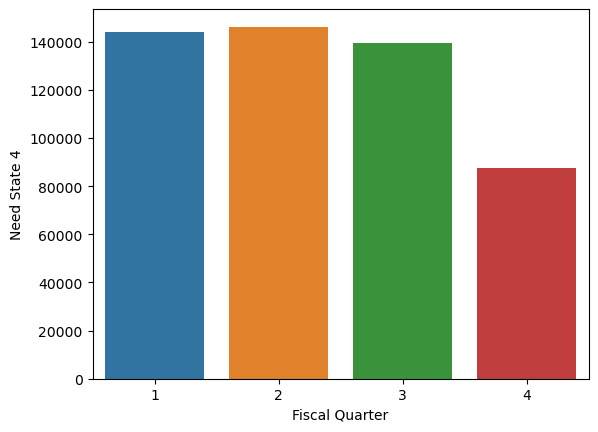

In [36]:
sns.barplot(data=df_2022, x='Fiscal Quarter', y='Need State 4')

<Axes: xlabel='Fiscal Quarter', ylabel='Need State 5'>

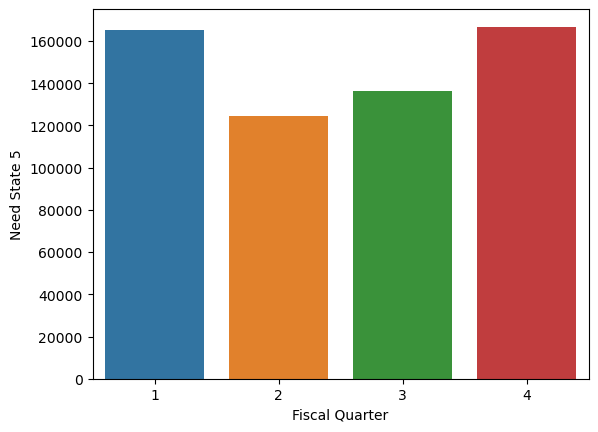

In [37]:
sns.barplot(data=df_2022, x='Fiscal Quarter', y='Need State 5')

Based on the quarterly analysis conducted, variations in Trade Spend across quarters can be observed for Need State 3 & 5.